In [ ]:
import requests
import pandas as pd

# List of symbols for multiple companies
symbols = ['IBM', 'ORCL', 'MSFT','SAP']

# Create an empty DataFrame to store the data
df = pd.DataFrame()

# API endpoint URL
url = 'https://www.alphavantage.co/query'

# Iterate over each symbol
for symbol in symbols:
    # API parameters
    params = {
        'function': 'BALANCE_SHEET',
        'symbol': symbol,
        'apikey': 'SPLNVZ1BSN4HJFG9'
    }

    # Make the API call
    response = requests.get(url, params=params)

    # Convert JSON response to DataFrame
    data = response.json()
    quarterly_reports = data['quarterlyReports']
    company_df = pd.DataFrame(quarterly_reports)

    # Add a 'Symbol' column with the company symbol
    company_df['Symbol'] = symbol
    company_df['Quarter'] = pd.to_datetime(company_df['fiscalDateEnding']).dt.quarter
    # Append the company DataFrame to the main DataFrame
    df = df.append(company_df, ignore_index=True)

# Print the resulting DataFrame
df


<ipython-input-10-bd12cdb62392>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(company_df, ignore_index=True)
<ipython-input-10-bd12cdb62392>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(company_df, ignore_index=True)
<ipython-input-10-bd12cdb62392>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(company_df, ignore_index=True)
<ipython-input-10-bd12cdb62392>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(company_df, ignore_index=True)


,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding,Symbol,Quarter
0,2023-03-31,USD,133637000000,35982000000,9337000000,9337000000,1603000000,12626000000,96048000000,5344000000,...,86257000000,8289000000,12099000000,21604000000,169544000000,149253000000,58675000000,907500000,IBM,1
1,2022-12-31,USD,127243000000,29118000000,7886000000,7886000000,1552000000,14209000000,96874000000,5334000000,...,107759000000,9788000000,12243000000,21944000000,169484000000,149825000000,58343000000,906091977,IBM,4
2,2022-09-30,USD,125850000000,28999000000,7816000000,7816000000,1794000000,6289000000,95237000000,5150000000,...,76684000000,8740000000,13413000000,20076000000,169514000000,148611000000,58117000000,904076831,IBM,3
3,2022-06-30,USD,127503000000,27896000000,7034000000,7034000000,1684000000,6626000000,97917000000,5275000000,...,75151000000,8750000000,13486000000,19409000000,169522000000,153298000000,57802000000,901500000,IBM,2
4,2022-03-31,USD,133275000000,31330000000,9934000000,9934000000,1776000000,13725000000,100173000000,5559000000,...,81434000000,8433000000,13844000000,19050000000,169422000000,153401000000,57603000000,899316026,IBM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2019-03-31,USD,60596000000,16062000000,7332000000,7332000000,0,None,44534000000,6944486007.69,...,16353000000,4693000000,814000000,29177000000,-3521963175.87,27211000000,1229000000,1194000000,SAP,1
77,2018-12-31,USD,51491000000,16620000000,8627000000,8627000000,0,None,34871000000,5024156987.18,...,11303000000,4588000000,0,28832000000,-999999999999999999.99,27407000000,1229000000,1194000000,SAP,4
78,2018-09-30,USD,45646000000,11391000000,4507000000,4507000000,0,None,34255000000,3959249826.35,...,7925000000,3618000000,0,26964000000,-188698664188530000,25769000000,1229000000,1194000000,SAP,3
79,2018-06-30,USD,45481000000,11448000000,4515000000,4515000000,0,None,34034000000,3822160148.98,...,7675000000,3698000000,0,25814000000,-1703771822250.10,24739000000,1229000000,1194000000,SAP,2


Liquidity Ratios:
Current Ratio: Current Assets / Current Liabilities

Quick Ratio (Acid-Test Ratio): (Current Assets - Inventory) / Current Liabilities

Cash Ratio: Cash and Cash Equivalents / Current Liabilities

Profitability Ratios:
Gross Profit Margin: (Gross Profit / Revenue) * 100

Net Profit Margin: (Net Income / Revenue) * 100

Return on Assets (ROA): (Net Income / Total Assets) * 100

Return on Equity (ROE): (Net Income / Shareholders' Equity) * 100

Solvency Ratios:

Debt-to-Equity Ratio: Total Debt / Shareholders' Equity

Debt Ratio: Total Debt / Total Assets

Interest Coverage Ratio: Earnings Before Interest and Taxes (EBIT) /
Interest Expense

Efficiency Ratios:

Inventory Turnover: Cost of Goods Sold / Average Inventory

Accounts Receivable Turnover: Revenue / Average Accounts Receivable

Accounts Payable Turnover: Purchases / Average Accounts Payable

Asset Turnover: Revenue / Average Total Assets


Market Ratios:

Price-to-Earnings Ratio (P/E Ratio): Market Price per Share / Earnings
per Share

Price-to-Sales Ratio (P/S Ratio): Market Price per Share / Revenue per
Share

Dividend Yield: Dividends per Share / Market Price per Share

In [ ]:
!pip install yahooquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from yahooquery import Ticker
import pandas as pd

symbols = ['ibm', 'msft', 'orcl','sap']
ratios_list = []

for symbol in symbols:
    ticker = Ticker(symbol)
    income_statement = ticker.income_statement('q')
    income_statement=income_statement[income_statement['periodType']=='3M']
    balance_sheet = ticker.balance_sheet('q')
    market_price_per_share = ticker.history(period='1d')['close'].iloc[-1]
    outstanding_shares = ticker.key_stats[symbol]['sharesOutstanding']
    balance_sheet = balance_sheet.reset_index(drop=True)
    income_statement = income_statement.reset_index(drop=True)

    Net_profit_margin = income_statement["NetIncome"] / income_statement["TotalRevenue"]
    operating_profit_margin = income_statement['EBIT'] / income_statement['TotalRevenue']
    Interest_burden = income_statement["PretaxIncome"] / income_statement["EBIT"]
    Tax_burden = income_statement["NetIncome"] / income_statement["PretaxIncome"]
    Asset_turnover = income_statement["TotalRevenue"] / balance_sheet["TotalAssets"]
    equity_multiplier = balance_sheet['TotalAssets'] / balance_sheet['StockholdersEquity']
    current_ratio = balance_sheet['CurrentAssets'] / balance_sheet['CurrentLiabilities']
    cash_ratio = balance_sheet['CashAndCashEquivalents'] / balance_sheet['CurrentLiabilities']
    debt_equity_ratio = balance_sheet['TotalDebt'] / balance_sheet['StockholdersEquity']
    debt_ratio = balance_sheet['TotalDebt'] / balance_sheet['TotalAssets']
    interest_coverage = income_statement['EBIT'] / income_statement['InterestExpense']
    total_assets = balance_sheet["TotalAssets"]
    date=balance_sheet['asOfDate']
    profit_margin = income_statement['NetIncome'] / income_statement['TotalRevenue']
    return_on_assets = income_statement['NetIncome'] / balance_sheet['TotalAssets']
    price_to_earnings = market_price_per_share / (income_statement['NetIncome'] / outstanding_shares)
    price_to_sales = market_price_per_share / (income_statement['TotalRevenue'] / outstanding_shares)
    return_on_equity=Net_profit_margin*Asset_turnover*equity_multiplier

    ratios_dict = pd.DataFrame({
        'Date':date,
        'Symbol':symbol,
        'Return on Equity':return_on_equity,
        'Total Assets': total_assets,
        'Net profit margin': Net_profit_margin,
        'Operating profit margin': operating_profit_margin,
        'Interest burden': Interest_burden,
        'Tax burden': Tax_burden,
        'Asset Turnover': Asset_turnover,
        'Equity Multiplier': equity_multiplier,
        'Current Ratio': current_ratio,
        'Cash Ratio': cash_ratio,
        'Debt To Equity Ratio': debt_equity_ratio,
        'Debt Ratio': debt_ratio,
        'Interest Coverage': interest_coverage,
        'Profit Margin': profit_margin,
        'Return on Assets': return_on_assets,
        'P/E ratio': price_to_earnings,
        'P/S ratio': price_to_sales
    })


    ratios_list.append(ratios_dict)

ratios_df = pd.concat(ratios_list).set_index('Symbol')
# ratios_df.set_index('Symbol')

In [ ]:
ratios_df

,Date,Return on Equity,Total Assets,Net profit margin,Operating profit margin,Interest burden,Tax burden,Asset Turnover,Equity Multiplier,Current Ratio,Cash Ratio,Debt To Equity Ratio,Debt Ratio,Interest Coverage,Profit Margin,Return on Assets,P/E ratio,P/S ratio
Symbol,,,,,,,,,,,,,,,,,,
ibm,2022-03-31,0.038478,1.332750e+11,0.051627,0.065784,0.667024,1.176565,0.106532,6.996063,0.919955,0.291696,3.020840,0.431791,3.003215,0.051627,0.005500,164.315262,8.483102
ibm,2022-06-30,0.071719,1.275030e+11,0.089598,0.129956,0.852897,0.808362,0.121848,6.569272,0.876021,0.220889,2.750013,0.418618,6.797980,0.089598,0.010917,86.525206,7.752516
ibm,2022-09-30,-0.159195,1.258500e+11,-0.226554,-0.298150,1.070138,0.710064,0.112094,6.268679,0.951848,0.256548,2.681112,0.427700,-14.257627,-0.226554,-0.025395,-37.685572,8.537824
ibm,2022-12-31,0.123496,1.272430e+11,0.162363,0.217183,0.913655,0.818237,0.131174,5.798533,0.924234,0.250309,2.461402,0.424487,11.581470,0.162363,0.021298,44.443944,7.216050
ibm,2023-03-31,0.042909,1.336370e+11,0.065044,0.099986,0.742456,0.876181,0.106647,6.185753,1.160972,0.301262,2.854842,0.461519,3.882834,0.065044,0.006937,129.927818,8.450960
msft,2022-03-31,0.102674,3.446070e+11,0.338898,0.419226,0.975692,0.828529,0.143236,2.115140,1.987655,0.161392,0.376145,0.177834,41.139165,0.338898,0.048542,149.323198,50.605317
msft,2022-06-30,0.100515,3.648400e+11,0.322761,0.395912,0.997711,0.817104,0.142158,2.190679,1.784607,0.146516,0.367895,0.167937,41.399194,0.322761,0.045883,149.216156,48.161158
msft,2022-09-30,0.101149,3.597840e+11,0.350265,0.440366,0.977347,0.813833,0.139311,2.072894,1.840186,0.261864,0.347315,0.167551,44.144000,0.350265,0.048796,142.280614,49.835969
msft,2022-12-31,0.089687,3.645520e+11,0.311392,0.386733,0.997059,0.807562,0.144690,1.990608,1.931313,0.191463,0.328248,0.164898,41.630612,0.311392,0.045055,152.077836,47.355839


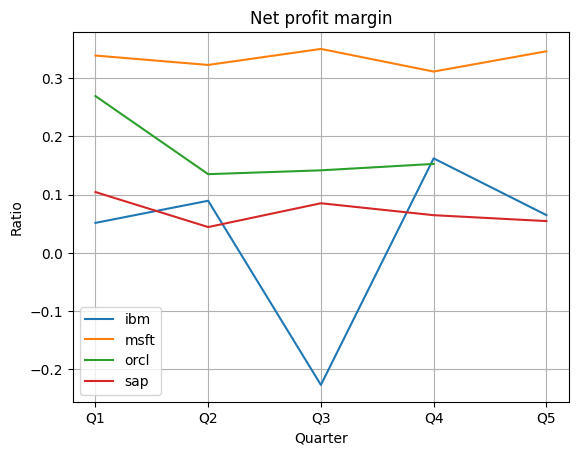

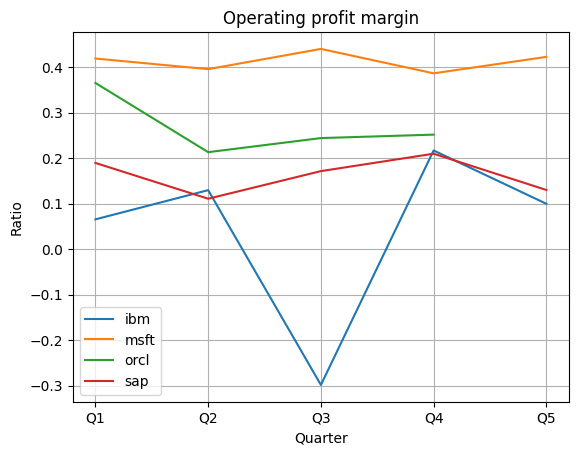

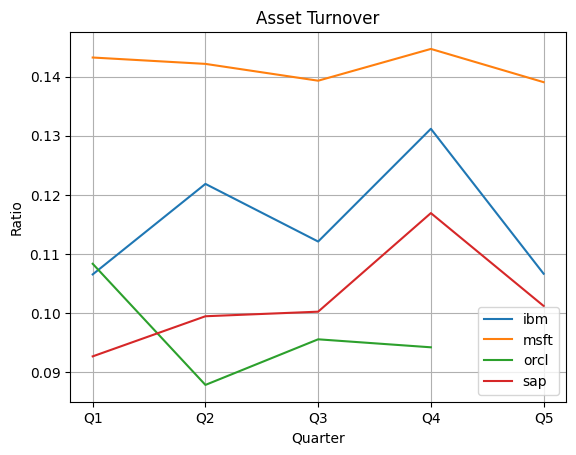

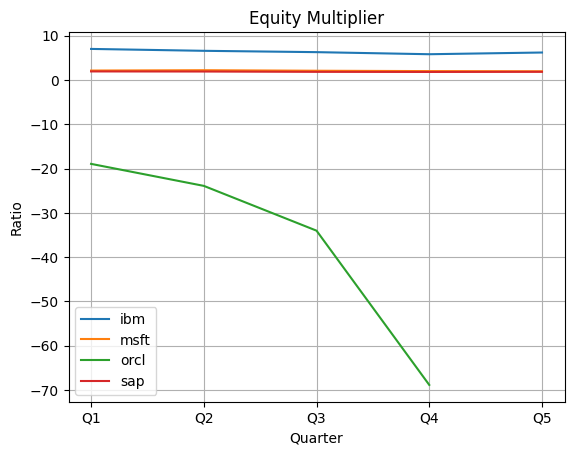

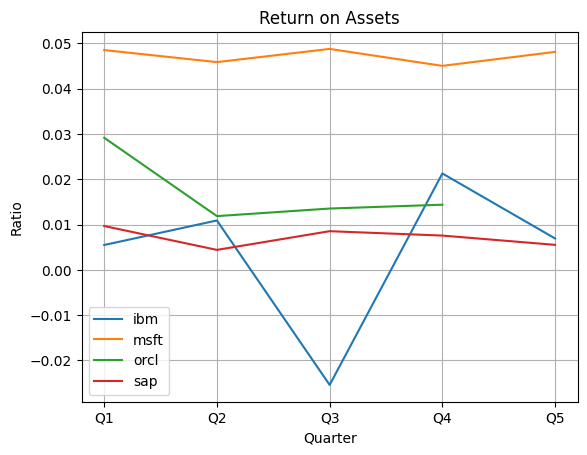

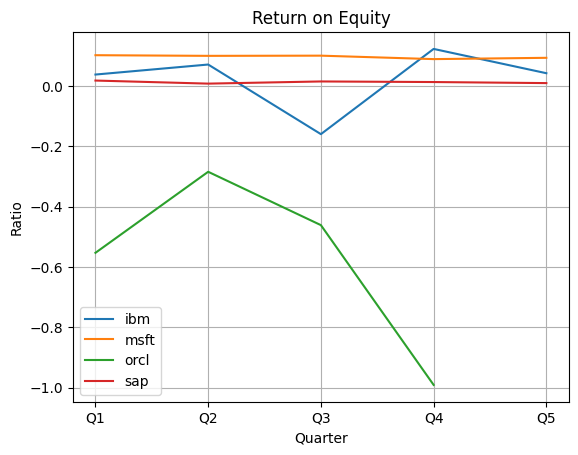

In [ ]:
import matplotlib.pyplot as plt

# Select the ratios you want to plot
ratios_to_plot = ['Net profit margin', 'Operating profit margin', 'Asset Turnover','Equity Multiplier', 'Return on Assets','Return on Equity']

# Create a dictionary to store the data for each ratio
ratio_data = {}

# Iterate over the ratios and store the data for each ratio
for ratio in ratios_to_plot:
    ratio_data[ratio] = {
        'Symbol': [],
        'Quarter': [],
        'Ratio': []
    }

# Iterate over the symbols and plot the ratios
for symbol in symbols:
    # Filter the ratios for the current symbol
    symbol_ratios = ratios_df.loc[symbol]

    # Get the quarters as strings (Q1, Q2, Q3, Q4)
    quarters = ['Q' + str(i) for i in range(1, len(symbol_ratios) + 1)]

    # Iterate over the ratios and store the data
    for ratio in ratios_to_plot:
        ratio_data[ratio]['Symbol'].extend([symbol] * len(quarters))
        ratio_data[ratio]['Quarter'].extend(quarters)
        ratio_data[ratio]['Ratio'].extend(symbol_ratios[ratio])

# Plot the data for each ratio
for ratio in ratios_to_plot:
    plt.figure()

    # Iterate over the symbols and plot the ratio for each symbol
    for symbol in symbols:
        # Filter the data for the current ratio and symbol
        symbol_data = ratio_data[ratio]
        symbol_quarters = [symbol_data['Quarter'][i] for i in range(len(symbol_data['Symbol'])) if symbol_data['Symbol'][i] == symbol]
        symbol_ratios = [symbol_data['Ratio'][i] for i in range(len(symbol_data['Symbol'])) if symbol_data['Symbol'][i] == symbol]

        # Plot the data for the current symbol
        plt.plot(symbol_quarters, symbol_ratios, label=symbol)

    plt.title(ratio)
    plt.xlabel('Quarter')
    plt.ylabel('Ratio')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd

# Select the ratios you want to calculate percentage change for
ratios_to_change = ['Net profit margin', 'Operating profit margin', 'Asset Turnover', 'Return on Assets']

# Create a dictionary to store the percentage change data for each ratio
change_data = {}

# Iterate over the ratios and initialize the data dictionary
for ratio in ratios_to_change:
    change_data[ratio] = {
        'Symbol': [],
        'Quarter': [],
        'Percentage Change': []
    }

# Iterate over the symbols and calculate percentage change for the ratios
for symbol in symbols:
    # Filter the ratios for the current symbol
    symbol_ratios = ratios_df.loc[symbol]

    # Get the quarters as strings (Q1, Q2, Q3, Q4)
    quarters = ['Q' + str(i) for i in range(1, len(symbol_ratios) + 1)]

    # Iterate over the ratios and calculate percentage change
    for ratio in ratios_to_change:
        # Get the ratio values for the current symbol
        symbol_values = symbol_ratios[ratio]

        # Calculate percentage change from the previous quarter
        percentage_change = symbol_values.pct_change() * 100

        # Skip the first quarter as it doesn't have a previous quarter for comparison
        percentage_change = percentage_change[1:]

        # Store the data in the change_data dictionary
        change_data[ratio]['Symbol'].extend([symbol] * len(percentage_change))
        change_data[ratio]['Quarter'].extend(quarters[1:])
        change_data[ratio]['Percentage Change'].extend(percentage_change)

# Create the DataFrame for percentage change data
change_df = pd.DataFrame(change_data)

# Print the DataFrame
change_df


,Net profit margin,Operating profit margin,Asset Turnover,Return on Assets
Symbol,"[ibm, ibm, ibm, ibm, msft, msft, msft, msft, o...","[ibm, ibm, ibm, ibm, msft, msft, msft, msft, o...","[ibm, ibm, ibm, ibm, msft, msft, msft, msft, o...","[ibm, ibm, ibm, ibm, msft, msft, msft, msft, o..."
Quarter,"[Q2, Q3, Q4, Q5, Q2, Q3, Q4, Q5, Q2, Q3, Q4, Q...","[Q2, Q3, Q4, Q5, Q2, Q3, Q4, Q5, Q2, Q3, Q4, Q...","[Q2, Q3, Q4, Q5, Q2, Q3, Q4, Q5, Q2, Q3, Q4, Q...","[Q2, Q3, Q4, Q5, Q2, Q3, Q4, Q5, Q2, Q3, Q4, Q..."
Percentage Change,"[73.54944130114383, -352.85531190596663, -171....","[97.55016738081008, -329.4232859009748, -172.8...","[14.377428584421924, -8.00533606286724, 17.021...","[98.50138828287902, -332.6133944350828, -183.8..."


In [ ]:
from scipy.stats import linregress

slopes = {}

for symbol in symbols:
    symbol_data = ratios_df.loc[symbol]

    unique_dates = symbol_data['Date'].unique()

    for ratio in ratios_df.columns[1:]:
        ratio_values = symbol_data[ratio].values

        valid_values = [value for value in ratio_values if not np.isnan(value)]

        if len(valid_values) >= 2:
            x_values = np.arange(len(valid_values))
            y_values = valid_values

            slope, _, _, _, _ = linregress(x_values, y_values)

            if symbol not in slopes:
                slopes[symbol] = {}

            slopes[symbol][ratio] = slope

slopes_df = pd.DataFrame(slopes)

print("Slopes of change:")
print(slopes_df)


Slopes of change:
                                  ibm          msft          orcl  \
Return on Equity         6.063893e-03 -2.818737e-03 -1.491674e-01   
Total Assets             4.640000e+07  7.067400e+09  6.512900e+09   
Net profit margin        9.959762e-03  3.231783e-04 -3.429045e-02   
Operating profit margin  1.556308e-02 -1.878121e-04 -3.097497e-02   
Interest burden          2.116229e-02  7.668530e-03 -3.462019e-02   
Tax burden              -5.908927e-02 -5.243302e-03 -1.983736e-02   
Asset Turnover           9.557104e-04 -5.809214e-04 -3.468117e-03   
Equity Multiplier       -2.391360e-01 -5.256636e-02 -1.597784e+01   
Current Ratio            5.302466e-02 -3.488184e-04 -2.367843e-01   
Cash Ratio               4.855123e-03  3.421130e-02 -2.258891e-01   
Debt To Equity Ratio    -6.206075e-02 -1.701875e-02 -1.118717e+01   
Debt Ratio               6.532437e-03 -4.024417e-03  1.539255e-03   
Interest Coverage        6.542727e-01  8.082121e-01 -7.709736e-01   
Profit Margin   

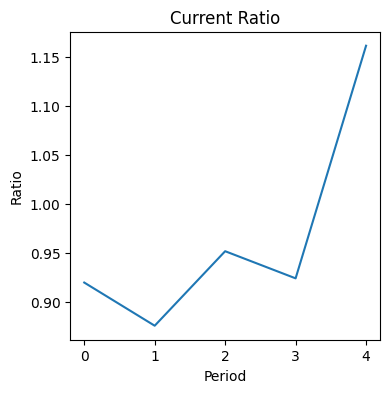

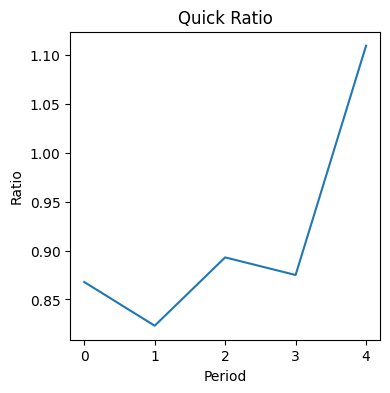

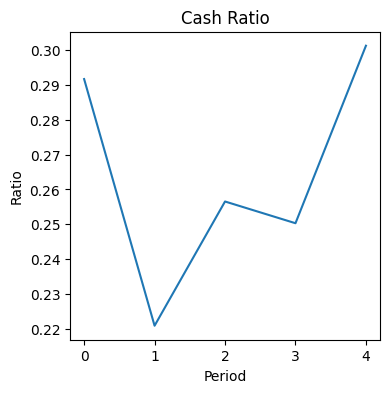

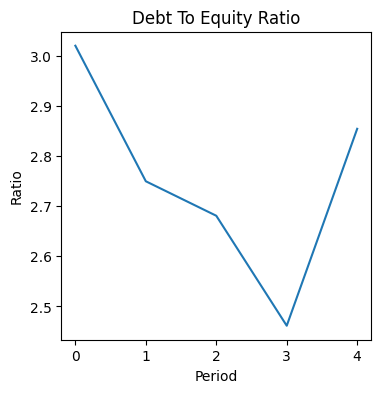

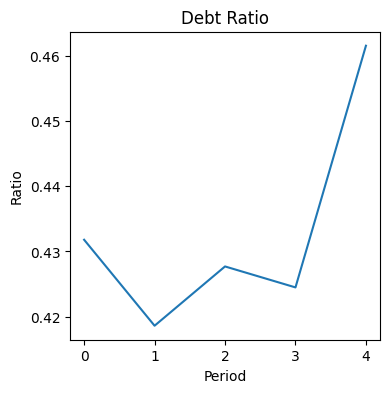

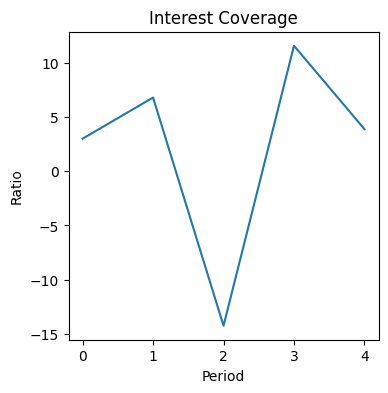

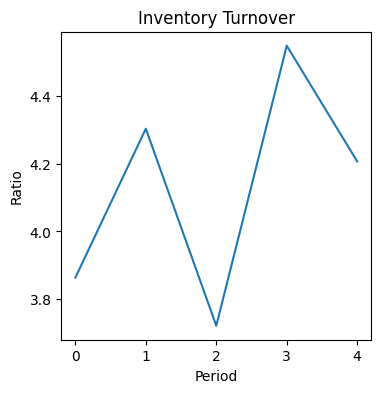

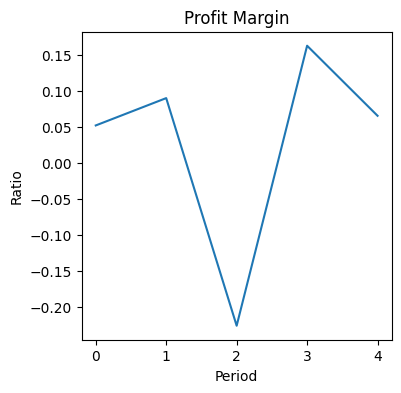

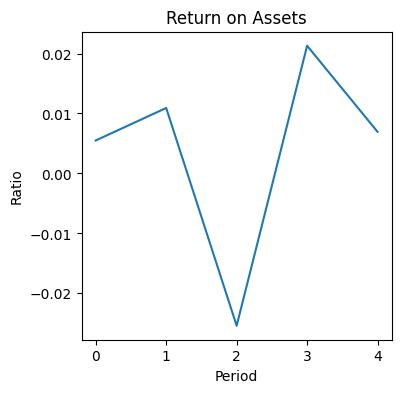

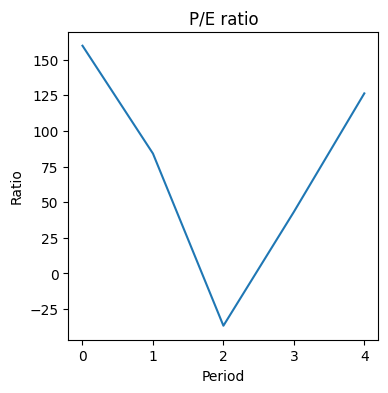

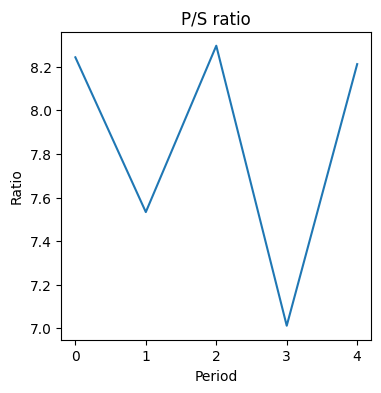

In [ ]:
import matplotlib.pyplot as plt

# Plot each ratio separately
for column in ratios.columns:
    plt.figure(figsize=(4, 4))
    plt.plot(ratios.index, ratios[column])
    plt.title(column)
    plt.xlabel('Period')
    plt.ylabel('Ratio')
    plt.show()


In [ ]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.0 MB/s eta 0:00:00


In [ ]:
from transformers import Conversation, pipeline


In [ ]:
model_name = "bert-base-uncased"  # Example: BERT model

In [ ]:
conversation = Conversation()
chat_pipeline = pipeline("conversational",model=model_name)

# Add user input to the conversation
conversation.add_user_input(user_input)

# Generate a response from the chat model
bot_response = chat_pipeline(conversation)


If you want to use `BertLMHeadModel` as a standalone, add `is_decoder=True.`
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertLMHeadModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertLMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertLMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
user_input = '''0.9199553676297862,0.8760206004270821,0.9518479616621808,0.924234248531979,1.1609718323492402] the given data is the current ratio for last 5 quaters of a xyz company in detail
Is the ratio of the company going up or down?'''
conversation.add_user_input(user_input)

# Generate a response from the chat model
bot_response = chat_pipeline(conversation)

Conversation input is to long (115), trimming it to (20 - 10)


In [ ]:
context = "[0.9199553676297862,0.8760206004270821,0.9518479616621808,0.924234248531979,1.1609718323492402] the given data is the current ratio for last 5 quaters of a xyz company in detail"
question = "Is the ratio of the company going up or down?"

result = pipeline(question=question, context=context)


In [ ]:
result

{'score': 0.0003408220363780856, 'start': 156, 'end': 159, 'answer': 'xyz'}

In [ ]:
answer = result["answer"]


In [ ]:
answer

'.9199553676297862'